In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
road = pd.read_csv(r"C:\Users\MS Mthethwa\Desktop\Avumile\Khan Road_interviews.csv")

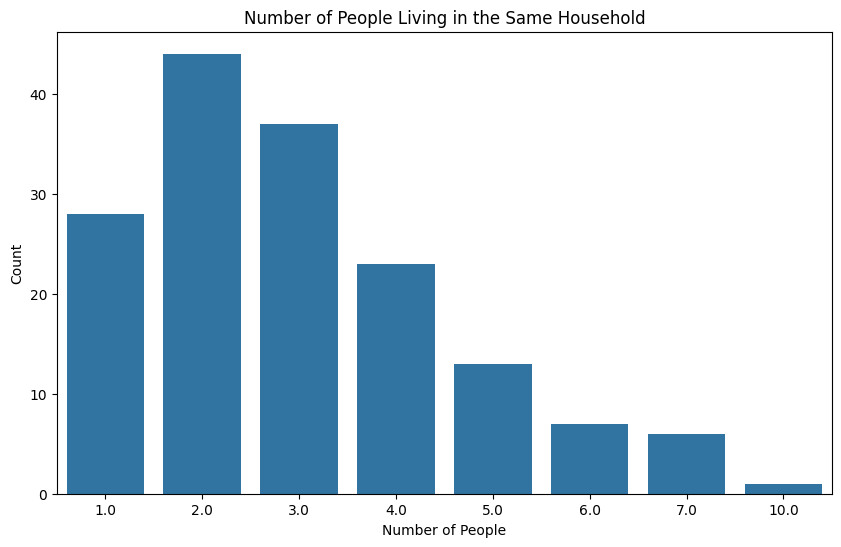

In [7]:
# Basic Charts
## 1. Bar plot - Number of people living in the same household
plt.figure(figsize=(10, 6))
sns.countplot(data=road, x='Number of people living in the same household?')
plt.title('Number of People Living in the Same Household')
plt.xlabel('Number of People')
plt.ylabel('Count')
plt.show()

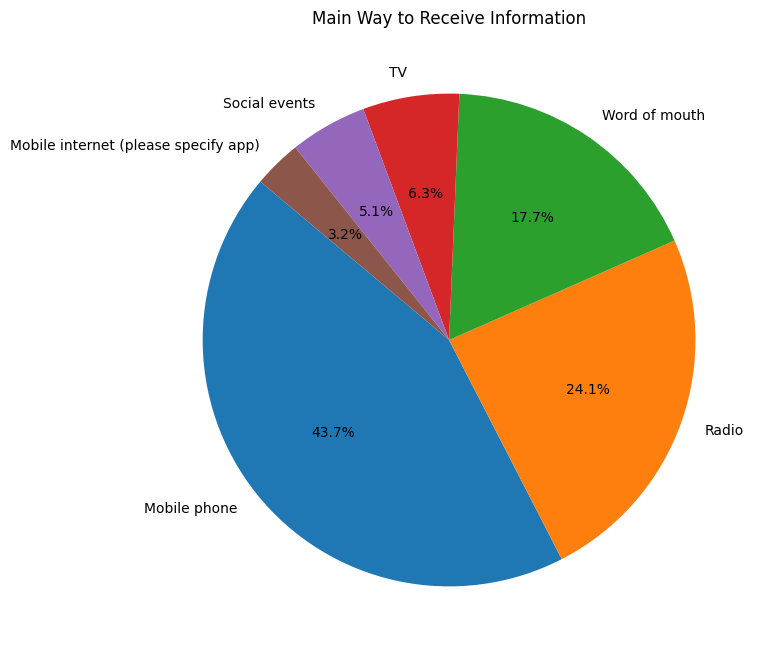

In [8]:
## 2. Pie chart - Main way to receive information
info_counts = road['What is your main way to receive information?'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(info_counts, labels=info_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Main Way to Receive Information')
plt.show()

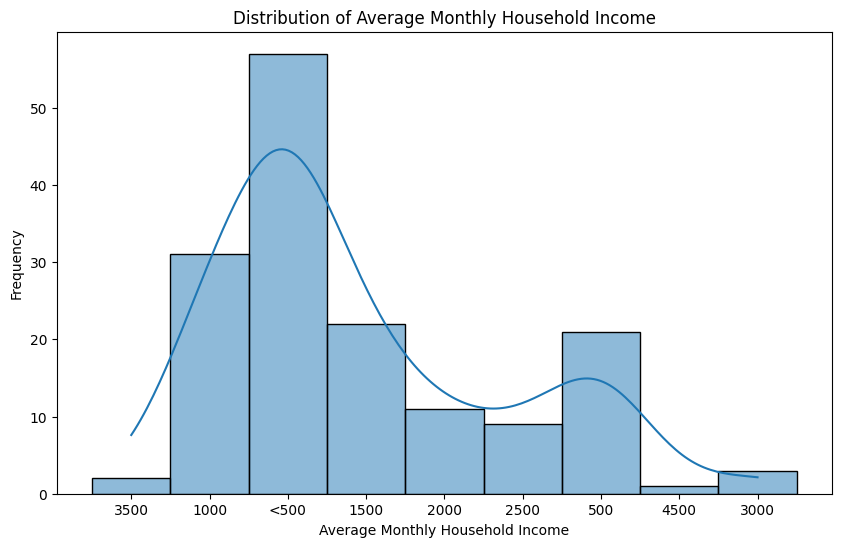

In [9]:
## 3. Histogram - Average monthly household income
plt.figure(figsize=(10, 6))
sns.histplot(data=road, x='What is your average monthly household income?', bins=20, kde=True)
plt.title('Distribution of Average Monthly Household Income')
plt.xlabel('Average Monthly Household Income')
plt.ylabel('Frequency')
plt.show()

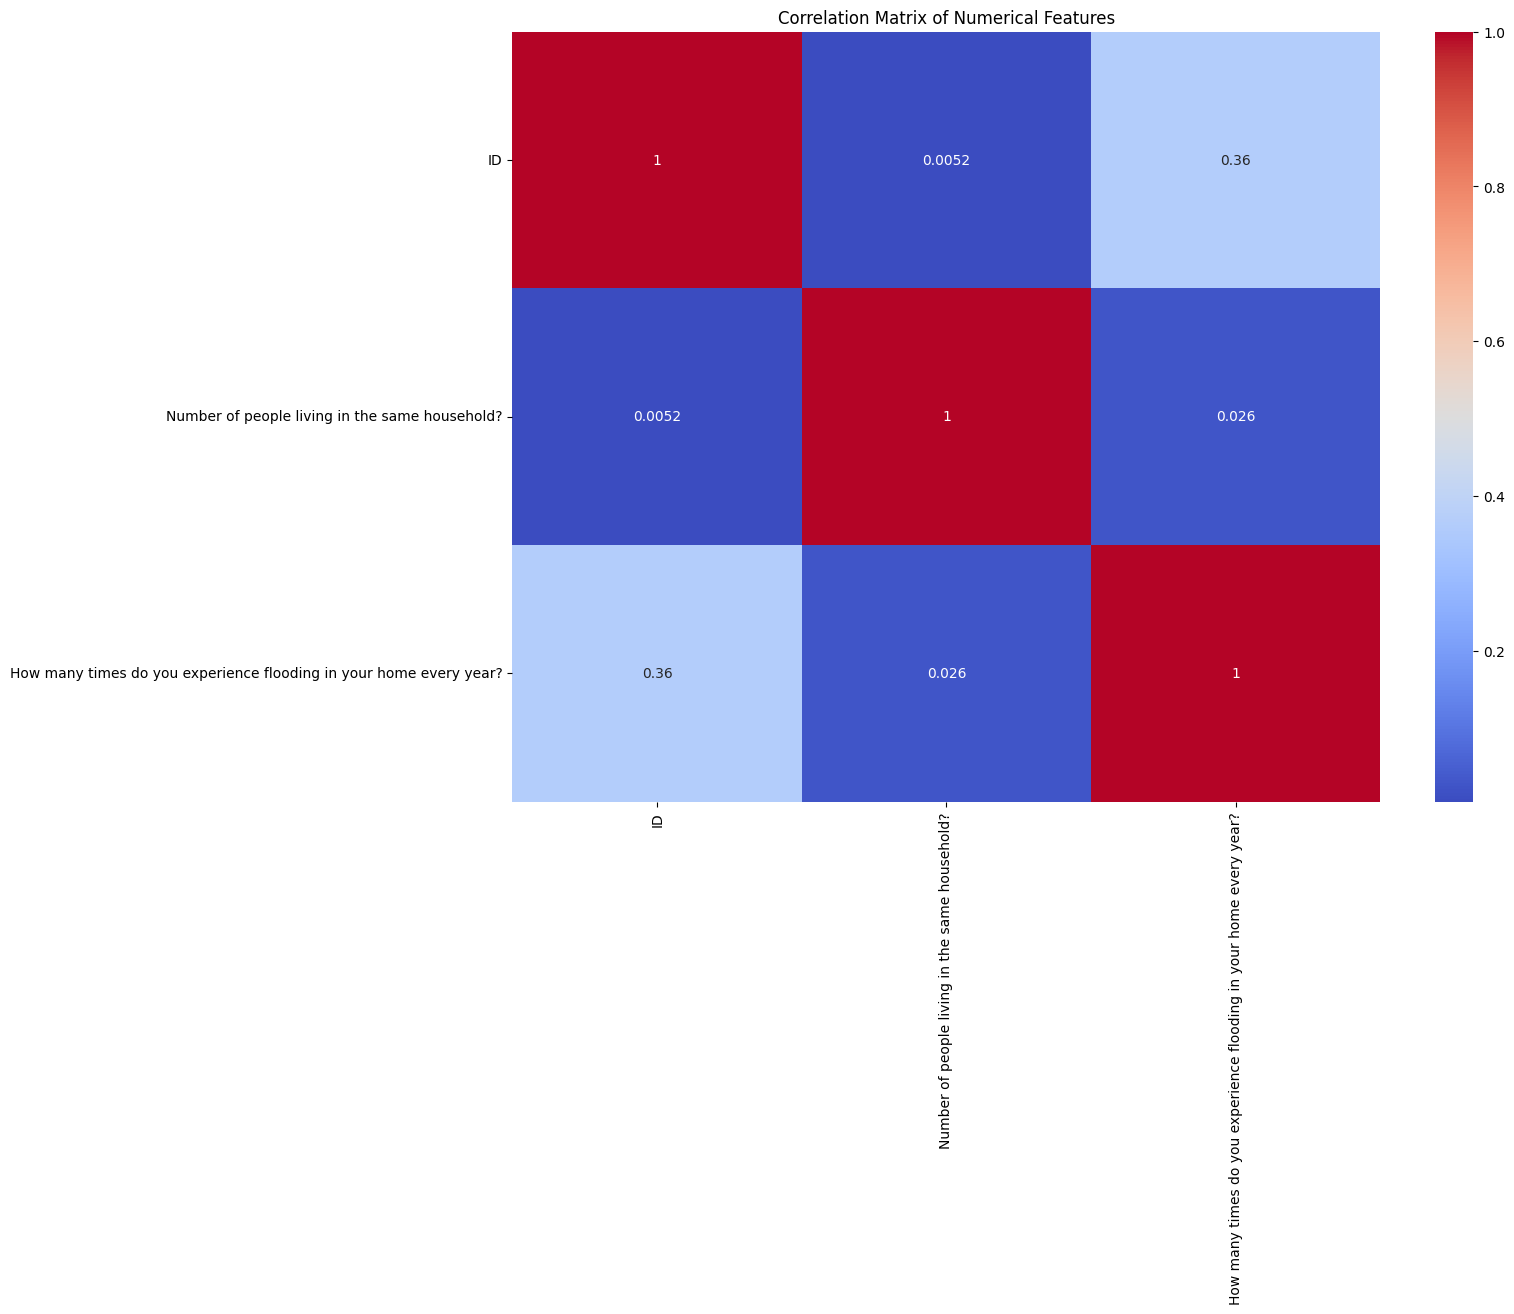

In [11]:
# Advanced Charts
## 1. Heatmap - Correlation matrix of numeric features
numeric_columns = road.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(14, 10))
correlation_matrix = road[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

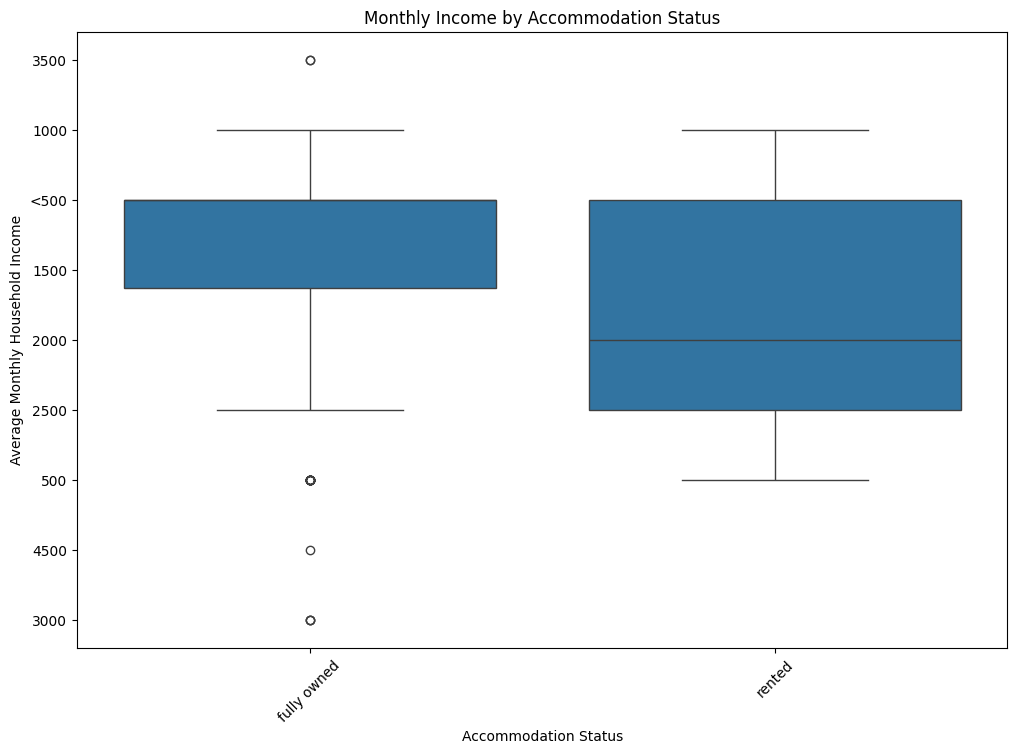

In [12]:
## 2. Box plot - Monthly income by accommodation status
plt.figure(figsize=(12, 8))
sns.boxplot(data=road, x='What best describes your accommodation status?', y='What is your average monthly household income?')
plt.title('Monthly Income by Accommodation Status')
plt.xlabel('Accommodation Status')
plt.ylabel('Average Monthly Household Income')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Key Insights
## Highlight significant patterns
# Identifying regions most lacking in basic services
basic_services = road[['Sanitation', 'Drainage Issues', 'Roof']]
basic_services_summary = basic_services.describe(include='all')
print("Basic Services Summary:\n", basic_services_summary)

Basic Services Summary:
                                                Sanitation  \
count                                                  39   
unique                                                 39   
top     https://files.ruralsenses.com/kobo-attachments...   
freq                                                    1   

                                          Drainage Issues  \
count                                                  36   
unique                                                 36   
top     https://files.ruralsenses.com/kobo-attachments...   
freq                                                    1   

                                                     Roof  
count                                                 134  
unique                                                134  
top     https://files.ruralsenses.com/kobo-attachments...  
freq                                                    1  


In [16]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Preprocess the income column
road['What is your average monthly household income?'] = road['What is your average monthly household income?'].replace('<500', '500')
road['What is your average monthly household income?'] = pd.to_numeric(road['What is your average monthly household income?'], errors='coerce')

# Correlation between variables (e.g., education level and monthly income)
# Encode categorical variables to numeric
label_encoder = LabelEncoder()
road['Education_Level_Encoded'] = label_encoder.fit_transform(road['What is the highest level of education have you completed?'])

education_income_corr = road[['Education_Level_Encoded', 'What is your average monthly household income?']].corr()
print("Correlation between Education Level and Monthly Income:\n", education_income_corr)

Correlation between Education Level and Monthly Income:
                                                 Education_Level_Encoded  \
Education_Level_Encoded                                        1.000000   
What is your average monthly household income?                 0.109862   

                                                What is your average monthly household income?  
Education_Level_Encoded                                                               0.109862  
What is your average monthly household income?                                        1.000000  


In [21]:
# Areas with the highest population density
population_density = road[['Where is your home?', 'Number of people living in the same household?']].groupby('Where is your home?').mean()
print("Population Density by Region:\n", population_density)

Population Density by Region:
                         Number of people living in the same household?
Where is your home?                                                   
-29.5591592,30.409067                                              3.0
-29.5594604,30.4092765                                             4.0
-29.5595071,30.4093825                                             4.0
-29.5595458,30.4102599                                             3.0
-29.5595833,30.4096219                                             3.0
...                                                                ...
-29.5611808,30.4101463                                             4.0
-29.5612385,30.4101388                                             2.0
-29.5613299,30.4101001                                             6.0
-29.5622813,30.4089424                                             2.0
-29.562322,30.4119731                                              5.0

[145 rows x 1 columns]
